# **Extract ASINs**

In [0]:
import pickle
import json

from google.colab import drive
drive.mount('/content/drive')

loadedjson = open('drive/My Drive/Colab Notebooks/APRD 6343/Topic Modeling/meta_Clothing_Shoes_and_Jewelry.json','r')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
count = 0
allproducts = {}
for aline in loadedjson:
  count += 1
  if count % 100000 ==0:
    print(count)

  aproduct = eval(aline)
  allproducts[aproduct['asin']] = aproduct


100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000


In [0]:
allcategories = {}
count = 0
for aproduct in allproducts:
  count += 1
  if count % 100000 ==0:
    print(count / 1503384)
  aproduct = allproducts[aproduct]
  if 'categories' in aproduct:
    for categories in aproduct['categories']:
      for acategory in categories:
        if acategory in allcategories:
          allcategories[acategory] += 1
        if acategory not in allcategories:
          allcategories[acategory] = 1

0.06651660520532346
0.13303321041064692
0.19954981561597038
0.26606642082129384
0.33258302602661727
0.39909963123194075
0.4656162364372642
0.5321328416425877
0.5986494468479111
0.6651660520532345
0.7316826572585581
0.7981992624638815
0.8647158676692049
0.9312324728745284
0.9977490780798518


In [0]:
sortedlist = []
for acategory in allcategories:
  sortedlist.append((allcategories[acategory],acategory))

sortedlist = sorted(sortedlist, reverse = True)
# for item in range(150,250):
#   print(sortedlist[item])

In [0]:
for i in sortedlist:
  if 'Merrell' in i:
    print(i)

(3848, 'Merrell')


In [0]:
allmerrellasins = set()
count = 0
for areview in allproducts:
  theproduct = allproducts[areview]
  count += 1
  if count % 100000 == 0:
    print(count / 1503384)
  
  for categories in theproduct['categories']:
    for acategory in categories:
      if 'merrell' in acategory.lower():
        allmerrellasins.add(theproduct['asin'])

print(len(allmerrellasins))

0.06651660520532346
0.13303321041064692
0.19954981561597038
0.26606642082129384
0.33258302602661727
0.39909963123194075
0.4656162364372642
0.5321328416425877
0.5986494468479111
0.6651660520532345
0.7316826572585581
0.7981992624638815
0.8647158676692049
0.9312324728745284
0.9977490780798518
3848


In [0]:
outputfile = open('drive/My Drive/Colab Notebooks/APRD 6343/Topic Modeling/all_merrell_asins.txt', 'w')

outputfile.write(','.join(allmerrellasins))
outputfile.close()

# **Extract Review json**

In [0]:
import pickle
import json

from google.colab import drive
drive.mount('/content/drive')

## this assigns the filename we're trying to load in to a string variable
path = 'drive/My Drive/Colab Notebooks/APRD 6343/Topic Modeling/reviews_Clothing_Shoes_and_Jewelry.json'
loadedjson = open(path,'r')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
count = 0
allreviews = {}
for aline in loadedjson:
  count += 1
  if count % 100000 == 0:
    print(count)
  areview = eval(aline)
  allreviews[count] = areview
print(len(allreviews))

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5748920


In [0]:
from time import sleep

allmerrellasins = []
for data in open('drive/My Drive/Colab Notebooks/APRD 6343/Topic Modeling/all_merrell_asins.txt','r'):
  asins = data.split(',')
  for anasin in asins:
    allmerrellasins.append(anasin)
    
print(len(allmerrellasins))
print(allmerrellasins)

3848
['B0070ZC6KK', 'B006PFR2OQ', 'B00D1TADRC', 'B00D1HJ8RU', 'B00599JI0K', 'B00B9UIM1E', 'B00D1KVZ50', 'B008J3C0QW', 'B006ZZNRAO', 'B005SHEUD8', 'B00B9U0AAK', 'B00710L79U', 'B00B9TVLTK', 'B00D1QUEH4', 'B0058YSKPA', 'B008MYWQKS', 'B0058Z0KIO', 'B000HMUG0U', 'B00491A218', 'B008J44MRG', 'B008J53G54', 'B000TE8AOU', 'B003IS8T1I', 'B00B9TYIWC', 'B000BY1BE4', 'B00D1QXGII', 'B00D1R24Q2', 'B00B9TZ6NC', 'B008J4RTFI', 'B00B98S41Y', 'B004D34B4Q', 'B006ZZNGGE', 'B006OQIE3E', 'B00710M3VQ', 'B0058YCGLE', 'B00B98MWCG', 'B006ZB4FV8', 'B00B9RTU8Q', 'B0012YERM0', 'B00B9TVKFU', 'B006ZBLHCS', 'B00D1R0GLM', 'B008J4FMES', 'B006ZB3EBK', 'B007KG8ZA4', 'B00B98QXY4', 'B008J427DM', 'B0055J81NY', 'B0070ZBX68', 'B00D1H1VRU', 'B000B2KMJQ', 'B008JEL4DG', 'B00B99LHXA', 'B003JJ77VY', 'B00B9RP8VE', 'B00D1HJJB0', 'B00542S5U6', 'B003YVIYOQ', 'B0058Y9YVE', 'B008J3BOJQ', 'B004D3AK3M', 'B00B9RQP48', 'B00D1P8XJ6', 'B00B9RPOHW', 'B0070ZBY8A', 'B004D329RW', 'B0070ZCFDI', 'B00B9TX2AG', 'B008JEIY8Y', 'B006OO3XS2', 'B000ZPEZGA', 

In [0]:
merrellreviews = {}
count = 0
for areview in allreviews:
  count += 1
  if count % 100000 == 0:
    print(count / 5742890)
  
  thereview = allreviews[areview]
  theasin = thereview['asin']
  reviewerid = thereview['reviewerID']

  if thereview['asin'] in allmerrellasins:
    thekey = '%s.%s' % (theasin, reviewerid)
    merrellreviews[thekey] = thereview

0.017412835697706207
0.034825671395412414
0.05223850709311862
0.06965134279082483
0.08706417848853104
0.10447701418623724
0.12188984988394345
0.13930268558164965
0.15671552127935587
0.17412835697706208
0.19154119267476827
0.20895402837247448
0.2263668640701807
0.2437796997678869
0.2611925354655931
0.2786053711632993
0.2960182068610055
0.31343104255871174
0.3308438782564179
0.34825671395412416
0.36566954965183035
0.38308238534953654
0.4004952210472428
0.41790805674494896
0.4353208924426552
0.4527337281403614
0.4701465638380676
0.4875593995357738
0.50497223523348
0.5223850709311862
0.5397979066288924
0.5572107423265986
0.5746235780243049
0.592036413722011
0.6094492494197172
0.6268620851174235
0.6442749208151297
0.6616877565128358
0.6791005922105421
0.6965134279082483
0.7139262636059545
0.7313390993036607
0.7487519350013669
0.7661647706990731
0.7835776063967793
0.8009904420944856
0.8184032777921917
0.8358161134898979
0.8532289491876042
0.8706417848853104
0.8880546205830165
0.9054674562807

In [0]:
print(len(merrellreviews))

25772


In [0]:
import json
json.dump(merrellreviews, open('drive/My Drive/Colab Notebooks/APRD 6343/Topic Modeling/merrellreviews.json', 'w'))

merrellreviews = json.load(open('drive/My Drive/Colab Notebooks/APRD 6343/Topic Modeling/merrellreviews.json','r'))
merrellreviews

{'B00009ZM7Z.A20Z62HCM53Z71': {'asin': 'B00009ZM7Z',
  'helpful': [0, 0],
  'overall': 5.0,
  'reviewText': "I'm a merrell shoe person and love that's all I wear.im a diabetic and MERRELLS is the best wearing shoes for meYES I recommend these shoes",
  'reviewTime': '05 8, 2014',
  'reviewerID': 'A20Z62HCM53Z71',
  'reviewerName': '13RWD',
  'summary': "Nice and we'll build",
  'unixReviewTime': 1399507200},
 'B00009ZM7Z.A20D88DJ5DPOVC': {'asin': 'B00009ZM7Z',
  'helpful': [0, 0],
  'overall': 5.0,
  'reviewText': 'I wear these in Afghanistan and they are nice. You can slip them off on the long plane flights too.When there is a rocket attack at night you can jump in your shoes and run.I am ordering my third pair now.',
  'reviewTime': '11 23, 2013',
  'reviewerID': 'A20D88DJ5DPOVC',
  'reviewerName': '1alan1',
  'summary': 'there are nice for Afghanistan.',
  'unixReviewTime': 1385164800},
 'B00009ZM7Z.A1LCZP39GKITZT': {'asin': 'B00009ZM7Z',
  'helpful': [0, 0],
  'overall': 5.0,
  're

# **Segmenting Sales**

In [0]:
allmerrellasins = {}
count = 0
from time import sleep

for areview in allproducts:
  count += 1
  if count % 100000 == 0:
    print(count/1503384)

  theproduct = allproducts[areview]
  if 'salesRank' in theproduct:
    for categories in theproduct['categories']:
      for acategory in categories:
        if 'merrell' in acategory.lower():
          for acategory in theproduct['salesRank']:
            allmerrellasins[areview] = theproduct['salesRank'][acategory]

print(len(allmerrellasins))

0.06651660520532346
0.13303321041064692
0.19954981561597038
0.26606642082129384
0.33258302602661727
0.39909963123194075
0.4656162364372642
0.5321328416425877
0.5986494468479111
0.6651660520532345
0.7316826572585581
0.7981992624638815
0.8647158676692049
0.9312324728745284
0.9977490780798518
3431


In [0]:
unsortedsalesrank = []
for aproduct in allmerrellasins:
  unsortedsalesrank.append((allmerrellasins[aproduct], aproduct))

unsortedsalesrank[0]

(307, 'B00009ZM7Z')

In [0]:
sortedsalesrank= sorted(unsortedsalesrank)
salesrank = []
for aproduct in sortedsalesrank:
  salesrank.append(aproduct[0])

print(salesrank[0:30])

[56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57, 80, 242, 242, 242, 242]


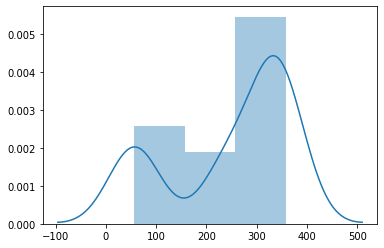

In [0]:
import numpy as np
import seaborn as sns
ax = sns.distplot(salesrank[0:100])

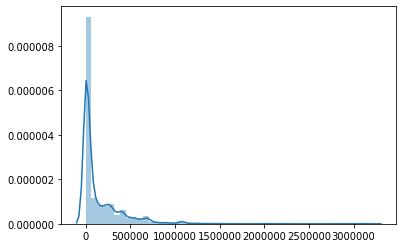

In [0]:
ax = sns.distplot(salesrank)

# **Preprocessing**

## Original

In [0]:
import json
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
merrellreviews = json.load(open('drive/My Drive/Colab Notebooks/APRD 6343/Topic Modeling/merrellreviews.json','r'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
merrelltext = []
for areview in merrellreviews:
  areview = merrellreviews[areview]
  if 'reviewText' in areview:
    merrelltext.append(areview['reviewText'])

# convert review texts to dictionary
merrelldict = dict(zip(range(len(merrelltext)), merrelltext))

In [0]:
! pip install tmtoolkit

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
import random
random.seed(20191120)
np.set_printoptions(precision=5)
from tmtoolkit.corpus import Corpus
corpus = Corpus()

# add documents to corpus
for key in merrelldict:
  corpus.add_doc(str(key), merrelldict[key])

In [0]:
print(len(corpus))
corpus.doc_labels
corpus['91']

25772


'Not my first pair and I could were them every day and not be disappointed.  They are some of the most comfortable shoes that I have ever owned.'

(array([2.3167e+04, 2.0630e+03, 3.8200e+02, 1.0900e+02, 2.9000e+01,
        1.3000e+01, 3.0000e+00, 5.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.0000e+00, 6.7480e+02, 1.3476e+03, 2.0204e+03, 2.6932e+03,
        3.3660e+03, 4.0388e+03, 4.7116e+03, 5.3844e+03, 6.0572e+03,
        6.7300e+03]),
 <a list of 10 Patch objects>)

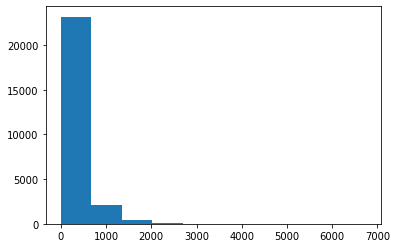

In [0]:
import matplotlib
matplotlib.pyplot.hist(corpus.doc_lengths.values()) 

In [0]:
# https://tmtoolkit.readthedocs.io/en/latest/preprocessing.html
from tmtoolkit.preprocess import TMPreproc

preproc = TMPreproc(corpus)
preproc.pos_tag()
preproc.lemmatize()
preproc.tokens_to_lowercase()
preproc.remove_special_chars_in_tokens()
preproc.add_stopwords(['http','nt'])

<TMPreproc [25772 documents]>

In [0]:
corpus['91']

'Not my first pair and I could were them every day and not be disappointed.  They are some of the most comfortable shoes that I have ever owned.'

In [0]:
preproc.vocabulary_size

25524

In [0]:
# preproc.stem()
preproc_smaller = preproc.copy()
preproc_smaller.filter_for_pos('N')
preproc_smaller.clean_tokens(remove_numbers = True, remove_shorter_than = 2)
preproc_smaller.remove_common_tokens(df_threshold = 1)
# preproc_smaller.remove_uncommon_tokens(df_threshold = 0.005)

print(preproc.vocabulary_size)
print(preproc_smaller.vocabulary_size)

25524
15528


In [0]:
print(preproc.tokens['91'])
print(preproc_smaller.tokens['91'])
print(preproc.tokens['1'])
print(preproc_smaller.tokens['1'])
print(preproc.tokens['2000'])
print(preproc_smaller.tokens['2000'])

['not', 'my', 'first', 'pair', 'and', 'i', 'could', 'be', 'them', 'every', 'day', 'and', 'not', 'be', 'disappoint', '', 'they', 'be', 'some', 'of', 'the', 'most', 'comfortable', 'shoe', 'that', 'i', 'have', 'ever', 'own', '']
['pair', 'day', 'shoe']
['i', 'wear', 'these', 'in', 'afghanistan', 'and', 'they', 'be', 'nice', '', 'you', 'can', 'slip', 'them', 'off', 'on', 'the', 'long', 'plane', 'flight', 'toowhen', 'there', 'be', 'a', 'rocket', 'attack', 'at', 'night', 'you', 'can', 'jump', 'in', 'your', 'shoe', 'and', 'runi', 'be', 'order', 'my', 'third', 'pair', 'now', '']
['afghanistan', 'plane', 'flight', 'toowhen', 'rocket', 'attack', 'night', 'shoe', 'pair']
['i', 've', 'always', 'like', 'the', 'jungle', 'moc', 'shoe', 'so', 'i', 'try', 'out', 'these', '', 'winter', '', 'type', 'moc', '', 'the', 'shoe', 'fit', 'well', '', 'the', 'back', 'of', 'the', 'heel', 'be', 'the', 'first', 'place', 'that', 'be', 'wear', 'out', '', 'but', 'that', 'be', 'about', '2', 'year', 'of', 'wear', 'them',

In [0]:
doc_labels = np.array(preproc.doc_labels)
doc_labels[:10]

array(['0', '1', '10', '100', '1000', '10000', '10001', '10002', '10003',
       '10004'], dtype='<U5')

In [0]:
vocab_sm = np.array(preproc_smaller.vocabulary)

In [0]:
dtm_sm = preproc_smaller.dtm
dtm_sm

<25772x15528 sparse matrix of type '<class 'numpy.int32'>'
	with 278960 stored elements in Compressed Sparse Row format>

## Top 1000 Sales Products Segment

In [0]:
sortedsalesrank= sorted(unsortedsalesrank)

# top 1000 products
top1000products = sortedsalesrank[0:1000]
top1000asins = []
for aproduct in top1000products:
  top1000asins.append(aproduct[1])
print(top1000asins)

['B0058YYKSG', 'B0058YYM1G', 'B0058YYMIO', 'B0058YYMW0', 'B0058YYN92', 'B0058YYNK6', 'B0058YYNP6', 'B0058YYOYG', 'B0058YYPHW', 'B0058YYPYU', 'B0058YYR6Q', 'B0058YYSIS', 'B0058YYUYU', 'B0058YYVDK', 'B0058YYWHA', 'B0058YYWZM', 'B0058YYXLK', 'B0058YYYBO', 'B0058YYYWS', 'B0058YYZCW', 'B0058YZ0JY', 'B0058YZ1O8', 'B0058YZ2DI', 'B000KR3D5W', 'B000KR3DAM', 'B00D1KM1W6', 'B0055J7E0A', 'B0055J7E1O', 'B0055J7E3M', 'B0055J7E5K', 'B0055J7E7I', 'B0055J8120', 'B0055J812K', 'B0055J814S', 'B0055J816G', 'B0055J8170', 'B0055J8184', 'B0055J818O', 'B0055J818Y', 'B0055J81AW', 'B0055J81K2', 'B0055J81NY', 'B0055J81P2', 'B0055J81UW', 'B0055J82T2', 'B00009ZM7Z', 'B00B98MPWS', 'B00B98MQI6', 'B00B98MR4E', 'B00B98MRS0', 'B00B98MSB6', 'B00B98MT06', 'B00B98MTQU', 'B00B98MV3Q', 'B00B98MVS6', 'B00B98MWCG', 'B00B98NANQ', 'B00B98NBB2', 'B00B98NBXA', 'B00B98NCIY', 'B00B98NEDW', 'B00B98NFAE', 'B00B98NIJW', 'B00B98NJLO', 'B00B98NL76', 'B00B98NOS2', 'B00B98NQIK', 'B00B98NRFM', 'B00B98NS0G', 'B00B98NTG4', 'B00B98OEO0', 'B00B

In [0]:
top1000reviews = {}
count = 0
for areview in allreviews:
  count += 1
  if count % 200000 == 0:
    print(count / 5742890)
  
  thereview = allreviews[areview]
  theasin = thereview['asin']
  reviewerid = thereview['reviewerID']

  if thereview['asin'] in top1000asins:
    thekey = '%s.%s' % (theasin, reviewerid)
    top1000reviews[thekey] = thereview

len(top1000reviews)

0.034825671395412414
0.06965134279082483
0.10447701418623724
0.13930268558164965
0.17412835697706208
0.20895402837247448
0.2437796997678869
0.2786053711632993
0.31343104255871174
0.34825671395412416
0.38308238534953654
0.41790805674494896
0.4527337281403614
0.4875593995357738
0.5223850709311862
0.5572107423265986
0.592036413722011
0.6268620851174235
0.6616877565128358
0.6965134279082483
0.7313390993036607
0.7661647706990731
0.8009904420944856
0.8358161134898979
0.8706417848853104
0.9054674562807228
0.9402931276761352
0.9751187990715476


8374

In [0]:
top1000text = []
for areview in top1000reviews:
  areview = top1000reviews[areview]
  if 'reviewText' in areview:
    top1000text.append(areview['reviewText'])

# convert review texts to dictionary
top1000dict = dict(zip(range(len(top1000text)), top1000text))
len(top1000dict)

8374

In [0]:
random.seed(20191120)
np.set_printoptions(precision=5)

top1000corp = Corpus()

# add documents to corpus
for key in top1000dict:
  top1000corp.add_doc(str(key), top1000dict[key])

print(len(top1000corp))
top1000corp['91']

8374


'Not my first pair and I could were them every day and not be disappointed.  They are some of the most comfortable shoes that I have ever owned.'

(array([6.591e+03, 1.320e+03, 3.070e+02, 8.700e+01, 4.100e+01, 1.700e+01,
        4.000e+00, 5.000e+00, 0.000e+00, 2.000e+00]),
 array([2.0000e+00, 4.0010e+02, 7.9820e+02, 1.1963e+03, 1.5944e+03,
        1.9925e+03, 2.3906e+03, 2.7887e+03, 3.1868e+03, 3.5849e+03,
        3.9830e+03]),
 <a list of 10 Patch objects>)

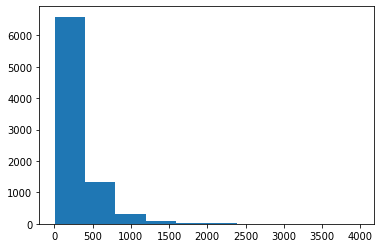

In [0]:
matplotlib.pyplot.hist(top1000corp.doc_lengths.values()) 

In [0]:
top1000preproc = TMPreproc(top1000corp)
top1000preproc.pos_tag()
top1000preproc.lemmatize()
top1000preproc.tokens_to_lowercase()
top1000preproc.remove_special_chars_in_tokens()
top1000preproc.add_stopwords(['http','nt'])

<TMPreproc [8374 documents]>

In [0]:
print(top1000preproc.vocabulary_size)
top1000corp['91']

11717


'Not my first pair and I could were them every day and not be disappointed.  They are some of the most comfortable shoes that I have ever owned.'

In [0]:
top1000preproc_smaller = top1000preproc.copy()
top1000preproc_smaller.filter_for_pos('N')
top1000preproc_smaller.clean_tokens(remove_numbers = True, remove_shorter_than = 2)
top1000preproc_smaller.remove_common_tokens(df_threshold = 1)

print(top1000preproc.vocabulary_size)
print(top1000preproc_smaller.vocabulary_size)

11717
6948


In [0]:
print(top1000preproc.tokens['91'])
print(top1000preproc_smaller.tokens['91'])
print(top1000preproc.tokens['1'])
print(top1000preproc_smaller.tokens['1'])
print(top1000preproc.tokens['2000'])
print(top1000preproc_smaller.tokens['2000'])

['not', 'my', 'first', 'pair', 'and', 'i', 'could', 'be', 'them', 'every', 'day', 'and', 'not', 'be', 'disappoint', '', 'they', 'be', 'some', 'of', 'the', 'most', 'comfortable', 'shoe', 'that', 'i', 'have', 'ever', 'own', '']
['pair', 'day', 'shoe']
['i', 'wear', 'these', 'in', 'afghanistan', 'and', 'they', 'be', 'nice', '', 'you', 'can', 'slip', 'them', 'off', 'on', 'the', 'long', 'plane', 'flight', 'toowhen', 'there', 'be', 'a', 'rocket', 'attack', 'at', 'night', 'you', 'can', 'jump', 'in', 'your', 'shoe', 'and', 'runi', 'be', 'order', 'my', 'third', 'pair', 'now', '']
['afghanistan', 'plane', 'flight', 'toowhen', 'rocket', 'attack', 'night', 'shoe', 'pair']
['i', 'own', 'four', 'pair', 'of', 'these', 'shoe', 'and', 'love', 'them', '', 'as', 'i', 'write', 'in', 'the', 'short', 'summary', '', 'they', 'be', 'very', 'comfortable', '', 'i', 'suffer', 'from', 'plantar', 's', 'fascitis', 'and', 'so', 'wear', 'these', 'shoe', 'almost', 'exclusively', 'with', 'the', 'powerstep', 'pro', 'tech

In [0]:
vocab_top1000 = np.array(top1000preproc_smaller.vocabulary)
dtm_top1000 = top1000preproc_smaller.dtm
dtm_top1000

<8374x6948 sparse matrix of type '<class 'numpy.int32'>'
	with 82791 stored elements in Compressed Sparse Row format>

## Bottom 1000 Sales Products Segment

In [0]:
# bottom 100 products
bottom1000products = sortedsalesrank[(len(sortedsalesrank)-1000):]
bottom1000asins = []
for aproduct in bottom1000products:
  bottom1000asins.append(aproduct[1])
print(bottom1000asins)

['B0058Y9CRA', 'B0058Y9EJ6', 'B0055J8B16', 'B00599LL5A', 'B000U1PMAW', 'B002TKLKMG', 'B0057IX1RO', 'B0051Y18CO', 'B002S53B06', 'B004J9AA5I', 'B00CLVTRZA', 'B003X24CH4', 'B004D32H60', 'B004D32K76', 'B004D32L8O', 'B004D34APG', 'B004D34DKI', 'B004D34E3E', 'B004D34EXO', 'B004D34F1U', 'B003PSWUTS', 'B0055J7MYS', 'B003WO9DM2', 'B003U6FNIK', 'B003T5PLVG', 'B0035PUJSK', 'B004D34OWU', 'B004D368S8', 'B006ZB7W90', 'B000HMRY5U', 'B00AKIC578', 'B004D7Z4FM', 'B000FICELU', 'B0010YOJ2A', 'B00917NRZ8', 'B00505QZTA', 'B002NTFY7U', 'B00599IFZO', 'B0035F8JEG', 'B0035FA278', 'B000TE2DGQ', 'B002LB38TG', 'B00492B0TU', 'B00AM2EM5A', 'B00AM2ENRM', 'B00AM2EOV2', 'B00AM2EPFM', 'B00AM2EQ60', 'B00AM2ER1E', 'B00AM2ESAY', 'B003UOZ35U', 'B003UP0WAA', 'B002YOSCCI', 'B0055J82MY', 'B004K1MT5Y', 'B0013RGIZK', 'B007232YH0', 'B003FNGK8U', 'B003QYP5ZM', 'B006OQIPE2', 'B0055J7N1K', 'B000ZPEZRY', 'B001O14M0I', 'B001O16AQ2', 'B00492B5WC', 'B0055J7A7W', 'B0055J7B1C', 'B004D366FI', 'B004NLCNE8', 'B004D3AV5Y', 'B000UVI12S', 'B005

In [0]:
bottom1000reviews = {}
count = 0
for areview in allreviews:
  count += 1
  if count % 200000 == 0:
    print(count / 5742890)
  
  thereview = allreviews[areview]
  theasin = thereview['asin']
  reviewerid = thereview['reviewerID']

  if thereview['asin'] in bottom1000asins:
    thekey = '%s.%s' % (theasin, reviewerid)
    bottom1000reviews[thekey] = thereview

len(bottom1000reviews)

0.034825671395412414
0.06965134279082483
0.10447701418623724
0.13930268558164965
0.17412835697706208
0.20895402837247448
0.2437796997678869
0.2786053711632993
0.31343104255871174
0.34825671395412416
0.38308238534953654
0.41790805674494896
0.4527337281403614
0.4875593995357738
0.5223850709311862
0.5572107423265986
0.592036413722011
0.6268620851174235
0.6616877565128358
0.6965134279082483
0.7313390993036607
0.7661647706990731
0.8009904420944856
0.8358161134898979
0.8706417848853104
0.9054674562807228
0.9402931276761352
0.9751187990715476


5070

In [0]:
bottom1000text = []
for areview in bottom1000reviews:
  areview = bottom1000reviews[areview]
  if 'reviewText' in areview:
    bottom1000text.append(areview['reviewText'])

# convert review texts to dictionary
bottom1000dict = dict(zip(range(len(bottom1000text)), bottom1000text))
len(bottom1000dict)

5070

In [0]:
random.seed(20191120)
np.set_printoptions(precision=5)

bottom1000corp = Corpus()

# add documents to corpus
for key in bottom1000dict:
  bottom1000corp.add_doc(str(key), bottom1000dict[key])

print(len(bottom1000corp))
bottom1000corp['90']

5070


"I just received these yesterday so I can't comment on the durability or function yet.  Don't know how they are going to feel after 5 miles on the trail or how they hold up crossing a stream.  However, they are very comfortable...so far so good.I bought these reluctantly.  I own a pair of Merrell Moab that I wear for almost everything.  They fit like a dream and wear like a sneaker.  But recently on long hikes I've had ankle pain because of an old football injury, and I decided I needed more ankle support.  That's what lead me to the Sawtooths.  Somehow Merrell figured out how to make a very big, clunky looking boot actually lightweight.  I think these are even lighter than my Moab's and they're much more waterproof.A note on the size...my feet are 11.5, but on my 2 other Merrell's I got a 12 because they run small.  The Sawtooth was not available in 12 so I got 11.5...fearing they would be too small.  These fit to size.  They are very comfortable, even with thicker socks.Finally, I ru

(array([4.189e+03, 6.780e+02, 1.390e+02, 3.900e+01, 1.600e+01, 5.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00]),
 array([4.0000e+00, 5.2540e+02, 1.0468e+03, 1.5682e+03, 2.0896e+03,
        2.6110e+03, 3.1324e+03, 3.6538e+03, 4.1752e+03, 4.6966e+03,
        5.2180e+03]),
 <a list of 10 Patch objects>)

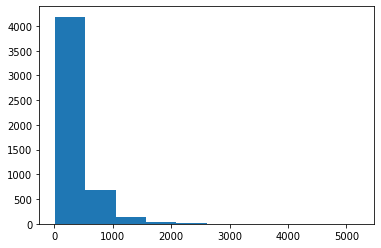

In [0]:
matplotlib.pyplot.hist(bottom1000corp.doc_lengths.values()) 

In [0]:
bottom1000preproc = TMPreproc(bottom1000corp)
bottom1000preproc.pos_tag()
bottom1000preproc.lemmatize()
bottom1000preproc.tokens_to_lowercase()
bottom1000preproc.remove_special_chars_in_tokens()
bottom1000preproc.add_stopwords(['http','nt'])

<TMPreproc [5070 documents]>

In [0]:
print(bottom1000preproc.vocabulary_size)
bottom1000corp['90']

10298


"I just received these yesterday so I can't comment on the durability or function yet.  Don't know how they are going to feel after 5 miles on the trail or how they hold up crossing a stream.  However, they are very comfortable...so far so good.I bought these reluctantly.  I own a pair of Merrell Moab that I wear for almost everything.  They fit like a dream and wear like a sneaker.  But recently on long hikes I've had ankle pain because of an old football injury, and I decided I needed more ankle support.  That's what lead me to the Sawtooths.  Somehow Merrell figured out how to make a very big, clunky looking boot actually lightweight.  I think these are even lighter than my Moab's and they're much more waterproof.A note on the size...my feet are 11.5, but on my 2 other Merrell's I got a 12 because they run small.  The Sawtooth was not available in 12 so I got 11.5...fearing they would be too small.  These fit to size.  They are very comfortable, even with thicker socks.Finally, I ru

In [0]:
bottom1000preproc_smaller = bottom1000preproc.copy()
bottom1000preproc_smaller.filter_for_pos('N')
bottom1000preproc_smaller.clean_tokens(remove_numbers = True, remove_shorter_than = 2)
bottom1000preproc_smaller.remove_common_tokens(df_threshold = 1)

print(bottom1000preproc.vocabulary_size)
print(bottom1000preproc_smaller.vocabulary_size)

10298
6314


In [0]:
print(bottom1000preproc.tokens['90'])
print(bottom1000preproc_smaller.tokens['90'])
print(bottom1000preproc.tokens['1'])
print(bottom1000preproc_smaller.tokens['1'])
print(bottom1000preproc.tokens['250'])
print(bottom1000preproc_smaller.tokens['250'])

['i', 'just', 'receive', 'these', 'yesterday', 'so', 'i', 'ca', 'nt', 'comment', 'on', 'the', 'durability', 'or', 'function', 'yet', '', 'do', 'nt', 'know', 'how', 'they', 'be', 'go', 'to', 'feel', 'after', '5', 'mile', 'on', 'the', 'trail', 'or', 'how', 'they', 'hold', 'up', 'cross', 'a', 'stream', '', 'however', '', 'they', 'be', 'very', 'comfortable', '', 'so', 'far', 'so', 'goodi', 'buy', 'these', 'reluctantly', '', 'i', 'own', 'a', 'pair', 'of', 'merrell', 'moab', 'that', 'i', 'wear', 'for', 'almost', 'everything', '', 'they', 'fit', 'like', 'a', 'dream', 'and', 'wear', 'like', 'a', 'sneaker', '', 'but', 'recently', 'on', 'long', 'hike', 'i', 've', 'have', 'ankle', 'pain', 'because', 'of', 'an', 'old', 'football', 'injury', '', 'and', 'i', 'decide', 'i', 'need', 'more', 'ankle', 'support', '', 'that', 's', 'what', 'lead', 'me', 'to', 'the', 'sawtooths', '', 'somehow', 'merrell', 'figure', 'out', 'how', 'to', 'make', 'a', 'very', 'big', '', 'clunky', 'look', 'boot', 'actually', 'li

In [0]:
vocab_bottom1000 = np.array(bottom1000preproc_smaller.vocabulary)
dtm_bottom1000 = bottom1000preproc_smaller.dtm
dtm_bottom1000

<5070x6314 sparse matrix of type '<class 'numpy.int32'>'
	with 56728 stored elements in Compressed Sparse Row format>

# **Creating Models**

In [0]:
!pip install tmtoolkit['lda']
import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel

In [0]:
# suppress the "INFO" messages and warnings from Ida
logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False

warnings.filterwarnings('ignore')

# set data to use
dtms = {
    'smaller': dtm_sm
}

dtms_seg = {
    'top1000': dtm_top1000,
    'bottom1000': dtm_bottom1000
}

# and fixed hyperparameters
lda_params = {
    'n_topics': 50,
    'eta': .01,
    'n_iter': 1000,
    'random_state': 20191122
}

lda_params_seg = {
    'n_topics': 20,
    'eta': .01,
    'n_iter': 1000,
    'random_state': 20191122}

In [0]:
models = compute_models_parallel(dtms, constant_parameters=lda_params)

In [0]:
models2 = compute_models_parallel(dtms_seg, constant_parameters=lda_params_seg)

## Original

In [0]:
model_sm = models['smaller'][0][1]

# from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words
# print_ldamodel_topic_words(model_sm.topic_word_, vocab_sm, top_n = 4)

from tmtoolkit.topicmod.model_io import ldamodel_top_topic_words
tm = pd.DataFrame(ldamodel_top_topic_words(model_sm.topic_word_, vocab_sm, top_n=5)).reset_index()
tm = tm.drop(columns = 'topic')
tm

,rank_1,rank_2,rank_3,rank_4,rank_5
0,great (0.08727),fit (0.04383),highly (0.04057),shoes (0.03675),comfortable (0.03081)
1,boot (0.1904),winter (0.08991),snow (0.07193),foot (0.04807),weather (0.04701)
2,size (0.4564),order (0.09801),half (0.07933),review (0.04915),fit (0.04513)
3,pair (0.09875),shoe (0.09675),merrell (0.08781),jungle (0.0758),mocs (0.06486)
4,toe (0.2152),box (0.1028),room (0.07542),foot (0.07153),shoe (0.06764)
5,water (0.1285),foot (0.05209),rain (0.0336),proof (0.024),puddle (0.01725)
6,pair (0.2437),year (0.1285),shoe (0.06099),month (0.05407),wear (0.03703)
7,sandal (0.2341),merrell (0.1089),pair (0.06943),style (0.04074),summer (0.0406)
8,style (0.1554),merrell (0.1387),shoe (0.1291),size (0.06107),fit (0.0591)
9,shoe (0.1979),merrill (0.1041),fit (0.08402),great (0.08144),pair (0.07853)


In [0]:
import re
merrelltopics = ''
for i in range(len(tm)):
  words = list(tm.iloc[i,:])
  aline = str(i)+': '+' '.join([re.sub(r'\s\(.*?\)','', w) for w in words])
  merrelltopics += aline + '\n'

print(merrelltopics)

0: great fit highly shoes comfortable
1: boot winter snow foot weather
2: size order half review fit
3: pair shoe merrell jungle mocs
4: toe box room foot shoe
5: water foot rain proof puddle
6: pair year shoe month wear
7: sandal merrell pair style summer
8: style merrell shoe size fit
9: shoe merrill fit great pair
10: shoe foot size width bit
11: shoe trail run mile running
12: shoe balance new merrell foot
13: shoe heel back blister ankle
14: pair price store shoe amazon
15: shoe summer pair great slipper
16: boot hike hiking mile moab
17: foot day shoe hour pain
18: merrell shoe quality comfort fit
19: merrell pair shoe clog encore
20: shoe star foot review people
21: shoe time period box break
22: shoe amazon size return order
23: shoe work day foot hour
24: shoe barefoot vibram toe feel
25: glove shoe barefoot merrell trail
26: quality fit material look thing
27: shoe pain foot barefoot mile
28: pair merrells year love one
29: toe shoe foot top box
30: shoe sole leather month ru

In [0]:
# save topics as txt file
outputfile = open('drive/My Drive/Colab Notebooks/APRD 6343/Topic Modeling/merrell_topics_50_8.txt', 'w')

outputfile.write(merrelltopics)
outputfile.close()

## Top 1000

In [0]:
model_top1000 = models2['top1000'][0][1]

from tmtoolkit.topicmod.model_io import ldamodel_top_topic_words
tmtop1000 = pd.DataFrame(ldamodel_top_topic_words(model_top1000.topic_word_, vocab_top1000, top_n=8)).reset_index()
tmtop1000 = tmtop1000.drop(columns = 'topic')
tmtop1000

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8
0,shoe (0.1323),foot (0.1109),support (0.05167),arch (0.03322),problem (0.03248),pain (0.03248),heel (0.02362),insert (0.02214)
1,shoe (0.1534),sole (0.03536),month (0.02415),merrell (0.02068),lace (0.02029),material (0.01623),foot (0.01527),quality (0.01507)
2,shoe (0.1278),foot (0.1025),toe (0.07351),box (0.02884),heel (0.02367),arch (0.02067),area (0.02067),top (0.01817)
3,foot (0.09389),sandal (0.0697),strap (0.05549),fit (0.03396),support (0.02797),merrell (0.02153),day (0.02131),jean (0.01931)
4,shoe (0.1802),pair (0.1238),merrell (0.0937),year (0.04437),foot (0.03612),brand (0.02745),sneaker (0.02188),love (0.02167)
5,shoe (0.2255),foot (0.04306),support (0.03668),fit (0.03645),feel (0.03121),weight (0.03076),great (0.02461),barefoot (0.01914)
6,foot (0.1359),shoe (0.1343),day (0.1172),work (0.06012),hour (0.04168),pair (0.02525),end (0.01443),time (0.01323)
7,pair (0.0841),merrell (0.08062),shoe (0.07888),jungle (0.05742),year (0.05085),mocs (0.04505),moc (0.03557),leather (0.02475)
8,size (0.3416),shoe (0.122),half (0.04493),order (0.04066),sock (0.03917),review (0.02952),fit (0.02599),bit (0.02544)
9,shoe (0.1103),glove (0.05644),trail (0.04997),barefoot (0.04214),running (0.02243),minimalist (0.02152),merrell (0.01972),road (0.01851)


In [0]:
top1000productstopics = ''
for i in range(len(tmtop1000)):
  words = list(tmtop1000.iloc[i,:])
  aline = str(i)+': '+' '.join([re.sub(r'\s\(.*?\)','', w) for w in words])
  top1000productstopics += aline + '\n'

print(top1000productstopics)

0: shoe foot support arch problem pain heel insert
1: shoe sole month merrell lace material foot quality
2: shoe foot toe box heel arch area top
3: foot sandal strap fit support merrell day jean
4: shoe pair merrell year foot brand sneaker love
5: shoe foot support fit feel weight great barefoot
6: foot shoe day work hour pair end time
7: pair merrell shoe jungle year mocs moc leather
8: size shoe half order sock review fit bit
9: shoe glove trail barefoot running minimalist merrell road
10: shoe traction foot water trail surface rock hiking
11: shoe toe size foot box width merrell fit
12: color shoe fit merrell picture size style brown
13: shoe merrell pair size quality fit year style
14: boot foot time day sock week review size
15: pair shoe year husband time day son one
16: shoe hiking pair day trip moab mile merrell
17: shoe pair great fit support color summer weight
18: sandal pair merrell color style year foot fit
19: shoe amazon merrell store size pair price time



In [0]:
# save topics as txt file
outputfile_top = open('drive/My Drive/Colab Notebooks/APRD 6343/Topic Modeling/merrelltop1000_topics_20_5.txt', 'w')

outputfile_top.write(top1000productstopics)
outputfile_top.close()

## Bottom 1000

In [0]:
model_bottom1000 = models2['bottom1000'][0][1]

from tmtoolkit.topicmod.model_io import ldamodel_top_topic_words
tmbottom1000 = pd.DataFrame(ldamodel_top_topic_words(model_bottom1000.topic_word_, vocab_bottom1000, top_n=5)).reset_index()
tmbottom1000 = tmbottom1000.drop(columns = 'topic')
tmbottom1000

,rank_1,rank_2,rank_3,rank_4,rank_5
0,shoe (0.1467),foot (0.1387),day (0.096),support (0.0435),arch (0.0345)
1,shoe (0.2272),foot (0.06819),support (0.05537),problem (0.03246),sock (0.02837)
2,shoe (0.1512),heel (0.05354),foot (0.04861),ankle (0.02813),way (0.02319)
3,pair (0.1104),merrell (0.07535),year (0.05574),merrells (0.05378),moab (0.03137)
4,shoe (0.09486),water (0.08123),foot (0.04857),day (0.03266),winter (0.01846)
5,toe (0.1053),foot (0.0924),shoe (0.09186),box (0.04405),bit (0.02579)
6,color (0.05307),jean (0.05142),clog (0.03538),look (0.03209),fit (0.03209)
7,shoe (0.1258),size (0.04911),merrell (0.04593),amazon (0.04301),product (0.03504)
8,boot (0.1041),pair (0.04146),lace (0.03788),year (0.03549),merrell (0.03281)
9,pair (0.1814),shoe (0.1326),year (0.05081),store (0.04457),time (0.0335)


In [0]:
bottom1000productstopics = ''
for i in range(len(tmbottom1000)):
  words = list(tmbottom1000.iloc[i,:])
  aline = str(i)+': '+' '.join([re.sub(r'\s\(.*?\)','', w) for w in words])
  bottom1000productstopics += aline + '\n'

print(bottom1000productstopics)

0: shoe foot day support arch
1: shoe foot support problem sock
2: shoe heel foot ankle way
3: pair merrell year merrells moab
4: shoe water foot day winter
5: toe foot shoe box bit
6: color jean clog look fit
7: shoe size merrell amazon product
8: boot pair lace year merrell
9: pair shoe year store time
10: shoe pair merrell year style
11: shoe merrell color style size
12: shoe barefoot glove running merrell
13: great shoe husband shoes size
14: size shoe fit order half
15: shoe pair day merrell foot
16: sandal foot merrell color summer
17: boot winter foot sock weather
18: shoe trail sole rock sol
19: boot day foot mile hike



In [0]:
# save topics as txt file
outputfile_bottom = open('drive/My Drive/Colab Notebooks/APRD 6343/Topic Modeling/merrellbottom1000_topics_20_5.txt', 'w')

outputfile_bottom.write(bottom1000productstopics)
outputfile_bottom.close()

# **Topic Names & Classifications**

In [0]:
from tmtoolkit.topicmod.model_io import ldamodel_top_doc_topics
from tmtoolkit.bow.bow_stats import doc_lengths
from tmtoolkit.topicmod.model_stats import generate_topic_labels_from_top_words
print(model_sm)
print(model_top1000)
print(model_bottom1000)

doc_topic = model_sm.doc_topic_
doc_topic_top = model_top1000.doc_topic_
doc_topic_bottom = model_bottom1000.doc_topic_

doc_labels = np.array(preproc_smaller.doc_labels)
doc_labels_top = np.array(top1000preproc_smaller.doc_labels)
doc_labels_bottom = np.array(bottom1000preproc_smaller.doc_labels)

topic_words = model_sm.topic_word_
topic_words_top = model_top1000.topic_word_
topic_words_bottom = model_bottom1000.topic_word_

doc_lengths_sm = doc_lengths(dtm_sm)
doc_lengths_top = doc_lengths(dtm_top1000)
doc_lengths_bottom = doc_lengths(dtm_bottom1000)

print(len(doc_topic), len(doc_topic_top), len(doc_topic_bottom))
print(len(doc_lengths_sm), len(doc_lengths_top), len(doc_lengths_bottom))


# remove 'uncommon words' preprocessing
topic_labels = generate_topic_labels_from_top_words(
    topic_words,
    doc_topic,
    doc_lengths_sm,
    vocab_sm,
    lambda_=.1
)

topic_labels_top = generate_topic_labels_from_top_words(
    topic_words_top,
    doc_topic_top,
    doc_lengths_top,
    vocab_top1000,
    lambda_=.1
)

topic_labels_bottom = generate_topic_labels_from_top_words(
    topic_words_bottom,
    doc_topic_bottom,
    doc_lengths_bottom,
    vocab_bottom1000,
    lambda_=.1
)


documentclassifications = ldamodel_top_doc_topics(doc_topic, doc_labels, top_n=4, topic_labels=topic_labels)
documentclassifications_top = ldamodel_top_doc_topics(doc_topic_top, doc_labels_top, top_n=4, topic_labels=topic_labels_top)
documentclassifications_bottom = ldamodel_top_doc_topics(doc_topic_bottom, doc_labels_bottom, top_n=4, topic_labels=topic_labels_bottom)

for index,arrow in documentclassifications.iterrows():
  documentclassifications.set_value(index, 'text', corpus[index])
for index,arrow in documentclassifications_top.iterrows():
  documentclassifications_top.set_value(index, 'text', corpus[index])
for index,arrow in documentclassifications_bottom.iterrows():
  documentclassifications_bottom.set_value(index, 'text', corpus[index]) 

25772 8374 5070
25772 8374 5070


In [0]:
print('Results_ori:')
lookup = documentclassifications[documentclassifications['text'].str.contains('quality')]
lookup = lookup[lookup['text'].str.contains(' price')]

print([lookup['rank_1'].iloc[0], lookup['text'].iloc[0]])
lookup.shape

Results_ori:
['46_disappoint (0.3389)', 'Love this shoe. Actually love Merrell products, high quality, comfortable, a bit pricey though. These shoes are very light and comfortable. Even though they are made as a water shoe, I wear them as regular, everyday athletic shoe. This model is apparently the old model and it is difficult to find in many sizes. I wish Merrell would bring them back.']


(205, 5)

In [0]:
print('Results_top:')
lookup_top = documentclassifications_top[documentclassifications_top['text'].str.contains('shoe')]
lookup_top = lookup_top[lookup_top['text'].str.contains('traction')]
lookup_top = lookup_top[lookup_top['text'].str.contains('water')]

print([lookup_top['rank_1'].iloc[0], lookup_top['text'].iloc[0]])
lookup_top.shape

Results_top:
['18_travel (0.3)', "UPDATE: 5/14I wore these for 2 weeks in Europe. They fit was great, the arch was comfortable and my feet did not hurt at the end of a long day of walking; they worked well in mud and grit,  and they were very water resistent. However, these mocs are DANGEROUS on wet, smooth rock/tile/cobble surfaces. They have no traction on such surfaces. The treads are not deep, so wet grass or leaves stick on the soles and turn the mocs into ice skates on wet surfaces. A few other comments related this slipping problem but I'd passed them over. You must be very careful. Choose another shoe if you know you will be in an area with stone surface sidewalks or streets.Without doubt some ugly shoes: suede mocs that have grafted with a tentacled sea creature. They look bulky but are surprisingly light. They slip right on and suck your feet in. The insole is well padded- I have high arches and PF and  I find that in shoes with good arch height, the support is either too sof

(31, 5)

In [0]:
print('Results_top:')
lookup_bottom = documentclassifications_bottom[documentclassifications_bottom['text'].str.contains('shoe')]
lookup_bottom = lookup_bottom[lookup_bottom['text'].str.contains('clog')]

print([lookup_bottom['rank_1'].iloc[0], lookup_bottom['text'].iloc[15]])
lookup_bottom.shape

Results_top:
['1_fasciitis (0.4429)', 'Encore clogs are best if you have to STAND on your job more often than walk.  As a surgical resident, I use Encore clogs on days that I am in the OR and have to stand for hours on end.  On days when I do floorwork and have to run around the hospital, I wear Jungle Mocs (short for "Mocasin") instead.  The quality of construction of both shoes is fantastic.  The open back of the clog allows much better air circulation and standing comfort than the Moc.  But the clog is slightly less natural to walk in and is harder to run in (for example, when you get called to a code) than the Moc.  So know the types of things this shoe is good for and not good for before choosing it over the Jungle Moc.']


(27, 5)

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

documentclassifications.to_excel('drive/My Drive/Colab Notebooks/APRD 6343/Topic Modeling/merrell_topics_documentclassifications_n4.xlsx')
documentclassifications_top.to_excel('drive/My Drive/Colab Notebooks/APRD 6343/Topic Modeling/merrell_topics_documentclassifications_top_n4.xlsx')
documentclassifications_bottom.to_excel('drive/My Drive/Colab Notebooks/APRD 6343/Topic Modeling/merrell_topics_documentclassifications_bottom_n4.xlsx')

Mounted at /content/drive
